# **Project 2**, APS1070 Summer 2022
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Jun 25, 11 PM - 15 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Yusuf Olonade
*   Student Number: 1006814743

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



##**Part 1: Getting started [2 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **284807 rows**
* What features in the dataset are present aside from the 28 main features? **Time and Amount**
* Which column contains the targets? **Column 31 (Class)**
* What is the meaning of target values? **Target values represents the class of each data point in the set, they are the values to be predicted by the model.**

In [86]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [88]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [90]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [91]:
df.shape

(284807, 31)

In [92]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [93]:
df.columns.get_loc("Class")

30

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? **Valid transactions (Class 0): 0.998273 (99.8273 %), Fraudulent transactions (Class 1): 0.001727 (0.1727 %)**
* Is this data considered balanced or unbalanced? Why is this the case? **This data is unbalanced because the classes in the target are not in a balanced ratio as presented in question 1 above. Class 0 has significantly higher entries (99. 8273 %) compared to Class 1 (0.1727 %).**
* Why is balance/imbalance important? How might this class distribution affect a KNN classifier for example, which we explored in Project 1? **When an instance-based model like KNN is trained with an unbalanced dataset like this, it is likely to be biased to Class 0 (the majority class) when making predictions on a test set because in most cases the K nearest neighbors will be Class 0 since they make up over 99 % of the class distribution and as such it will be very unlikely for the KNN model to predict a Class 1 thus reducing the test accuracy of the model.**
* What metrics should we use to evaluate a model in such cases? **Metrics such as precision, recall and F1 score should be used.**


In [94]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Next, split the dataset into a training (65%), validation (20%) and testing set (15%). Set the random state to 40. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [95]:
pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Class', 
                                                                            train_size=0.65, valid_size=0.2, test_size=0.15, random_state=40)

In [97]:
# Get the shape of all the datasets
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(185124, 30)
(185124,)
(56961, 30)
(56961,)
(42722, 30)
(42722,)


(None, None)

Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

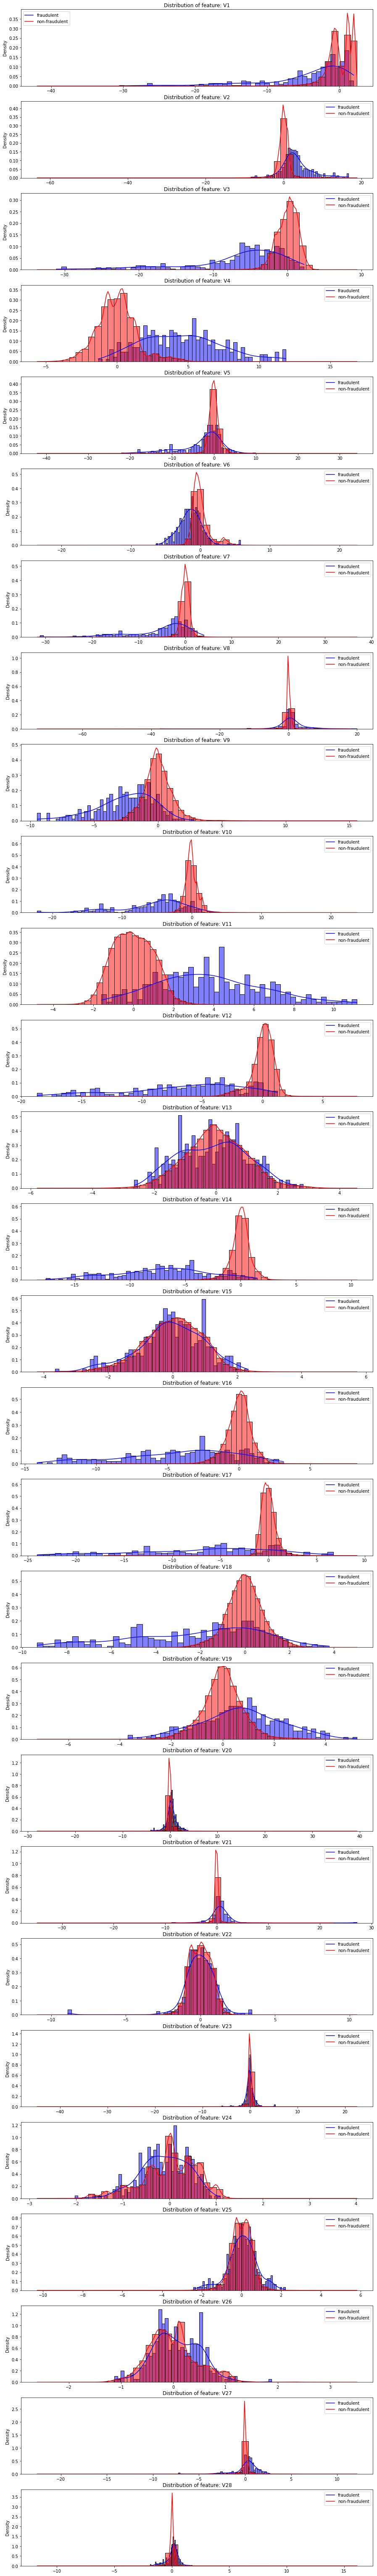

In [98]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**The graphs above can provide the following meaningful information about anomaly detection using gaussian model;**

**1. Which features can be used to easily distinguish between fraudulent and non-fraudulent transactions based on how separated the classes are on the histogram. This will guide us to select the best features to train our gaussian model. For example, V14 appears to be a good feature while V15 may not be very useful due to very high intersection between fraudulent and non-fraudulent transactions.**

**2. The distribution of each feature also gives us an intuition as to how many components may be needed in our model based on the spread of data points.**




## **Part 2: One Gaussian model with Single feature: [2 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. **[0.3]**
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way! Hint: See Tutorial 2's methods of coming up with thresholds) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  7. Report Precision, Recall and F1 score on both training and validation set in a table using the threshold you found in previous step. 
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold. **The operations count is found to be 6 + 4N and the big O notation is O(N) where  N = 12**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Repeat part 2a to compute AUC, F1 score, Precision and Recall when you fit a Gaussian **only on non-fraudulent transactions in the training set** in step 1 (instead of all the transactions).
 3. Compare your results from parts 2a and 2b in a table (for both training and validation set). **[0.2]**
 4. Are these results different or similar? Why? 
**The results appeared to be similar except for some very small differences in Precision and F1 Score. This can be attributed to the presence of very little fraudulent transactions (Class 1) in the *X_train* dataset which is not sufficient to cause a significant difference in the mean and variance used to compute the log-likelihoods.**

In [99]:
# Part 2a (1-3): Fitting regardless of class, computing AUC for each feature

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
import pandas as pd

features_iterate = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
features = []
AUC_train = []
AUC_valid = []

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

for i in features_iterate:
  gm.fit(X_train[i].values.reshape(-1,1))                                # Reshape each feature from a 1D to 2D array
  p_train = gm.score_samples(X_train[i].values.reshape(-1,1))             
  p_valid = gm.score_samples(X_valid[i].values.reshape(-1,1))
  auc_train = roc_auc_score(y_train, -1 * p_train)                       
  auc_valid = roc_auc_score(y_valid, -1 * p_valid)
  features.append(i)
  AUC_train.append(auc_train)
  AUC_valid.append(auc_valid)

zipped = list(zip(features, AUC_train, AUC_valid))
df2 = pd.DataFrame(zipped, columns=['Features', 'AUC Train', 'AUC Valid'])
df2

,Features,AUC Train,AUC Valid
0,V1,0.681267,0.741432
1,V2,0.860191,0.827630
2,V3,0.866830,0.881650
3,V4,0.894652,0.916770
4,V5,0.761584,0.778574
5,V6,0.723087,0.744222
6,V7,0.872079,0.848773
7,V8,0.770833,0.791903
8,V9,0.803450,0.834805
9,V10,0.913807,0.945576


In [100]:
# Part 2a (4): Selecting best features to distinguish fraudulent & non-fraudulent transactions based on the AUC of the validation set

df2.sort_values(by="AUC Valid", ascending=False)

# From the table, the best features selected are V14 > V17 > V10

,Features,AUC Train,AUC Valid
13,V14,0.954023,0.958037
16,V17,0.927781,0.951067
9,V10,0.913807,0.945576
15,V16,0.898363,0.934111
10,V11,0.899352,0.920838
11,V12,0.908296,0.918368
3,V4,0.894652,0.916770
2,V3,0.866830,0.881650
6,V7,0.872079,0.848773
17,V18,0.799974,0.834985


In [101]:
# Part 2a (5)
# Tunning thresholds to find the optimum for the 3 best features V14, V17, V10

from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

def threshold_selector(x):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm.fit(X_train[x].values.reshape(-1,1))
  p = gm.score_samples(X_valid[x].values.reshape(-1,1))
  for i in [1, 10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300]: 
    tr = sorted(p)[i]                                                     # Testing different thresholds
    f1 = f1_score(y_valid, p < tr)
    result = print('For i: ',i,'\t  threshold: ','%.3f'% tr ,'\t  f1 score: ', '%.3f' % f1)
  return result

print ("V14: ")
threshold_selector('V14')

print ("\n\nV17: ")
threshold_selector('V17')

print ("\n\nV10: ")
threshold_selector('V10')

V14: 
For i:  1 	  threshold:  -193.126 	  f1 score:  0.021
For i:  10 	  threshold:  -92.962 	  f1 score:  0.189
For i:  20 	  threshold:  -66.138 	  f1 score:  0.345
For i:  40 	  threshold:  -36.912 	  f1 score:  0.529
For i:  60 	  threshold:  -27.567 	  f1 score:  0.564
For i:  80 	  threshold:  -19.942 	  f1 score:  0.636
For i:  100 	  threshold:  -18.092 	  f1 score:  0.592
For i:  120 	  threshold:  -15.429 	  f1 score:  0.574
For i:  150 	  threshold:  -12.407 	  f1 score:  0.577
For i:  200 	  threshold:  -10.103 	  f1 score:  0.486
For i:  250 	  threshold:  -8.681 	  f1 score:  0.439
For i:  300 	  threshold:  -7.853 	  f1 score:  0.399


V17: 
For i:  1 	  threshold:  -393.217 	  f1 score:  0.021
For i:  10 	  threshold:  -161.192 	  f1 score:  0.189
For i:  20 	  threshold:  -120.578 	  f1 score:  0.310
For i:  40 	  threshold:  -60.796 	  f1 score:  0.544
For i:  60 	  threshold:  -26.996 	  f1 score:  0.628
For i:  80 	  threshold:  -19.590 	  f1 score:  0.614
For i:  

In [102]:
# Part 2a (6)
# Performance of gaussian model based on optimum threshold

from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

features_dic = {'V10': -24.741, 'V14': -19.942, 'V17': -26.996}  # Optimum threshold for each feature from the result of Part 2a (5) above
features = []
optimum_threshold = []
precision_train = []
precision_valid = []
recall_train = []
recall_valid = []
f1score_train = []
f1score_valid = []

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
for k, v in features_dic.items():
  gm.fit(X_train[k].values.reshape(-1,1))      
  p_train = gm.score_samples(X_train[k].values.reshape(-1,1))             
  p_valid = gm.score_samples(X_valid[k].values.reshape(-1,1))
  pr_train = precision_score(y_train, p_train < v)
  pr_valid = precision_score(y_valid, p_valid < v)  
  re_train = recall_score(y_train, p_train < v)
  re_valid = recall_score(y_valid, p_valid < v)
  f1_train = f1_score(y_train, p_train < v)
  f1_valid = f1_score(y_valid, p_valid < v)
  features.append(k)
  optimum_threshold.append(v)
  precision_train.append(pr_train)
  precision_valid.append(pr_valid)
  recall_train.append(re_train)
  recall_valid.append(re_valid)
  f1score_train.append(f1_train)
  f1score_valid.append(f1_valid)

zipped = list(zip(features, optimum_threshold, precision_train, recall_train, f1score_train, precision_valid, recall_valid, f1score_valid))
df3 = pd.DataFrame(zipped, columns=['Features', 'Optimum Threshold', 'Training Precision', 'Training Recall', 'Training F1 Score', 'Validation Precision', 
                                    'Validation Recall', 'Validation F1 Score'])
df3


,Features,Optimum Threshold,Training Precision,Training Recall,Training F1 Score,Validation Precision,Validation Recall,Validation F1 Score
0,V10,-24.741,0.170431,0.256966,0.204938,0.192053,0.302083,0.234818
1,V14,-19.942,0.628289,0.591331,0.609250,0.700000,0.583333,0.636364
2,V17,-26.996,0.730000,0.452012,0.558317,0.816667,0.510417,0.628205


In [103]:
# Part 2b (1-2) 
# Fitting based on class, computing AUC for the 3 best features in Part 2a

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
import pandas as pd

features_iterate = ['V10', 'V14', 'V17']
features = []
AUC_train = []
AUC_valid = []

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)

for i in features_iterate:
  gm.fit(X_train[i][y_train==0].values.reshape(-1,1))                # Fitting model on non-fraudulent transactions ONLY
  p_train = gm.score_samples(X_train[i].values.reshape(-1,1))             
  p_valid = gm.score_samples(X_valid[i].values.reshape(-1,1))
  auc_train = roc_auc_score(y_train, -1 * p_train)                       
  auc_valid = roc_auc_score(y_valid, -1 * p_valid)
  features.append(i)
  AUC_train.append(auc_train)
  AUC_valid.append(auc_valid)

zipped = list(zip(features, AUC_train, AUC_valid))
df4 = pd.DataFrame(zipped, columns=['Features', 'AUC Train', 'AUC Valid'])
df4

,Features,AUC Train,AUC Valid
0,V10,0.913869,0.945692
1,V14,0.954344,0.957865
2,V17,0.927021,0.951155


In [104]:
# # Part 2b (1-2) 
# Tunning thresholds to find the optimum for the 3 best features, fitting model on non-fraudulent transactions ONLY

from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

def threshold_selector_2(y):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm.fit(X_train[y][y_train==0].values.reshape(-1,1))                                   # Fitting model on non-fraudulent transactions ONLY
  p = gm.score_samples(X_valid[y].values.reshape(-1,1))               
  for i in [1, 10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300]: 
    tr = sorted(p)[i] 
    f1 = f1_score(y_valid, p < tr)
    result = print('For i: ',i,'\t  threshold: ','%.3f'% tr ,'\t   f1 score: ', '%.3f' % f1)
  return result

print ("V14: ")
threshold_selector_2('V14')

print ("\n\nV17: ")
threshold_selector_2('V17')

print ("\n\nV10: ")
threshold_selector_2('V10')

V14: 
For i:  1 	  threshold:  -220.967 	   f1 score:  0.021
For i:  10 	  threshold:  -106.325 	   f1 score:  0.189
For i:  20 	  threshold:  -75.615 	   f1 score:  0.345
For i:  40 	  threshold:  -42.147 	   f1 score:  0.529
For i:  60 	  threshold:  -31.442 	   f1 score:  0.564
For i:  80 	  threshold:  -22.704 	   f1 score:  0.636
For i:  100 	  threshold:  -20.412 	   f1 score:  0.592
For i:  120 	  threshold:  -17.414 	   f1 score:  0.574
For i:  150 	  threshold:  -14.067 	   f1 score:  0.577
For i:  200 	  threshold:  -11.306 	   f1 score:  0.486
For i:  250 	  threshold:  -9.793 	   f1 score:  0.439
For i:  300 	  threshold:  -8.805 	   f1 score:  0.399


V17: 
For i:  1 	  threshold:  -505.578 	   f1 score:  0.021
For i:  10 	  threshold:  -207.162 	   f1 score:  0.189
For i:  20 	  threshold:  -154.915 	   f1 score:  0.310
For i:  40 	  threshold:  -77.994 	   f1 score:  0.544
For i:  60 	  threshold:  -34.234 	   f1 score:  0.628
For i:  80 	  threshold:  -24.733 	   f1 sco

In [105]:
# Part 2b (1-2) 
# Performance of gaussian model based on optimum threshold, fitting model on non-fraudulent transactions ONLY

from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

features_dic = {'V10': -26.578, 'V14': -22.704, 'V17': -34.234} # Optimum threshold for each feature from the result of Part 2b above
features = []
optimum_threshold = []
precision_train = []
precision_valid = []
recall_train = []
recall_valid = []
f1score_train = []
f1score_valid = []

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
for k, v in features_dic.items():
  gm.fit(X_train[k][y_train==0].values.reshape(-1,1))           # Fitting model on non-fraudulent transactions ONLY
  p_train = gm.score_samples(X_train[k].values.reshape(-1,1))             
  p_valid = gm.score_samples(X_valid[k].values.reshape(-1,1))
  pr_train = precision_score(y_train, p_train < v)
  pr_valid = precision_score(y_valid, p_valid < v)  
  re_train = recall_score(y_train, p_train < v)
  re_valid = recall_score(y_valid, p_valid < v)
  f1_train = f1_score(y_train, p_train < v)
  f1_valid = f1_score(y_valid, p_valid < v)
  features.append(k)
  optimum_threshold.append(v)
  precision_train.append(pr_train)
  precision_valid.append(pr_valid)
  recall_train.append(re_train)
  recall_valid.append(re_valid)
  f1score_train.append(f1_train)
  f1score_valid.append(f1_valid)

zipped = list(zip(features, optimum_threshold, precision_train, recall_train, f1score_train, precision_valid, recall_valid, f1score_valid))
df5 = pd.DataFrame(zipped, columns=['Features', 'Optimum Threshold', 'Training Precision', 'Training Recall', 'Training F1 Score', 
                                    'Validation Precision', 'Validation Recall', 'Validation F1 Score'])
df5


,Features,Optimum Threshold,Training Precision,Training Recall,Training F1 Score,Validation Precision,Validation Recall,Validation F1 Score
0,V10,-26.578,0.170431,0.256966,0.204938,0.193333,0.302083,0.235772
1,V14,-22.704,0.630363,0.591331,0.610224,0.691358,0.583333,0.632768
2,V17,-34.234,0.730000,0.452012,0.558317,0.816667,0.510417,0.628205


In [106]:
# Part 2b (3)
# Comparison of model performance in 2a and 2b

horizontal_stack = pd.concat([df3, df5], axis=1)
horizontal_stack

,Features,Optimum Threshold,Training Precision,Training Recall,Training F1 Score,Validation Precision,Validation Recall,Validation F1 Score,Features,Optimum Threshold,Training Precision,Training Recall,Training F1 Score,Validation Precision,Validation Recall,Validation F1 Score
0,V10,-24.741,0.170431,0.256966,0.204938,0.192053,0.302083,0.234818,V10,-26.578,0.170431,0.256966,0.204938,0.193333,0.302083,0.235772
1,V14,-19.942,0.628289,0.591331,0.609250,0.700000,0.583333,0.636364,V14,-22.704,0.630363,0.591331,0.610224,0.691358,0.583333,0.632768
2,V17,-26.996,0.730000,0.452012,0.558317,0.816667,0.510417,0.628205,V17,-34.234,0.730000,0.452012,0.558317,0.816667,0.510417,0.628205


## **Part 3: One Gaussian model with multiple features: [3 Marks]**
This part is similar to Part 2, but here we will pick multiple features and set the number of components **visually**.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features of the training set on a figure (f1 on the x-axis and f2 on the y-axis). **[0.25]**
 3. On the scatter plot, color the training set based on their class (non-fraudulents blue and fraudulents red). **[0.25]**
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). **[0.25]**
 5. Fit your Gaussian model on the training set (all samples). 
 6. Compute AUC on both training and validation sets. **[0.25]**
 7. Pick 3 new pair of features and repeat steps 2 to 6. **[0.5]**
 8. Pick the set with the highest AUC on the validation set (out of the four sets that you tried).
 9. Find a threshold to maximize your F1 Score on the validation set. **[0.25]**
 10. Plot two seperate figures (one for the training data and one for the validation data) similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in tutorial) **[0.25]**

b. 3D plot:

  1. Pick three features (say, f1, f2 and f3, you can choose the features with highest AUC scores from  part 2.) **[0.25]**
  2. Repeat steps 2 to 6. Use the function below for 3D plotting. Use different angles to get a better undrestanding of the plot. **[0.25]**
  3. Find a threshold to maximize your F1 Score on the validation set. **Optimum threshold was found to be *-82.623* with F1 Score of *0.628* as presented in the code cell Part 3b (3)**





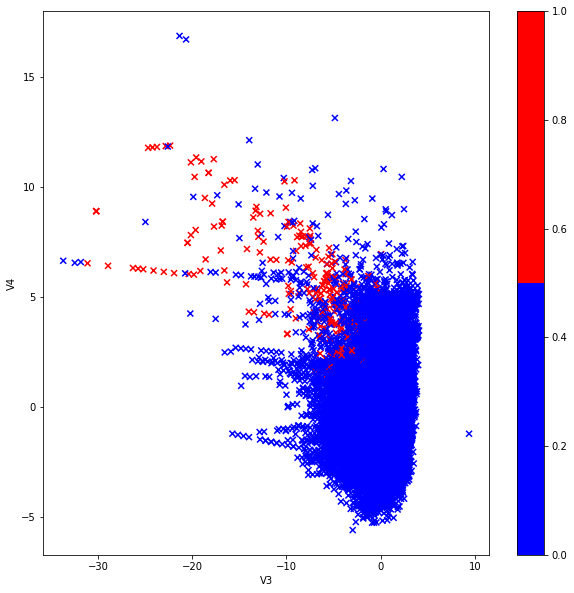

In [107]:
# Part 3a (1, 3)
# Scatter plot of V3 vs V4

import matplotlib
import matplotlib.pyplot as plt

def scatter_plotter(x,y):
  plt.figure(figsize=(10,10))
  colors = ['blue','red']
  plt.scatter(X_train[x], X_train[y], marker="x", c=y_train, cmap=matplotlib.colors.ListedColormap(colors))
  plt.colorbar()
  plt.xlabel(x)
  plt.ylabel(y)
scatter_plotter('V3', 'V4')

In [108]:
# Part 3a (4, 6)
# Based on plot in 3a above, 1-component gaussian is sufficient
# Fitting 1-component gaussian on features V3 & V4 and computing AUC

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

def gaussian_fitter_auc(x,y,n):
  gm = GaussianMixture(n_components = n, covariance_type = 'full', random_state=0)
  gm.fit(X_train[[x, y]])                   # Fitting n-component Gaussian on features V3 and V4                     
  p_train = gm.score_samples(X_train[[x, y]])           
  p_valid = gm.score_samples(X_valid[[x, y]])  
  auc_train = roc_auc_score(y_train, -1 * p_train)                       
  auc_valid = roc_auc_score(y_valid, -1 * p_valid)
  print('For features: ', x, 'and', y, '\t  Training AUC: ','%.3f'% auc_train , '   \t Validation AUC: ', '%.3f' % auc_valid)
gaussian_fitter_auc('V3', 'V4', 1) 

For features:  V3 and V4 	  Training AUC:  0.920    	 Validation AUC:  0.943


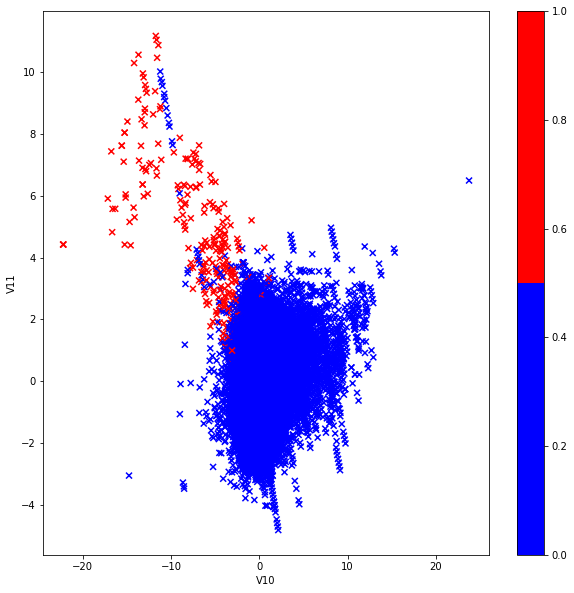

In [109]:
# Part 3a (7)
# Repeating steps 2-6 with features V10 and V11

scatter_plotter('V10', 'V11')

In [110]:
# Base on plot above , 1-component gaussian is sufficient

gaussian_fitter_auc('V10', 'V11', 1) 

For features:  V10 and V11 	  Training AUC:  0.927    	 Validation AUC:  0.960


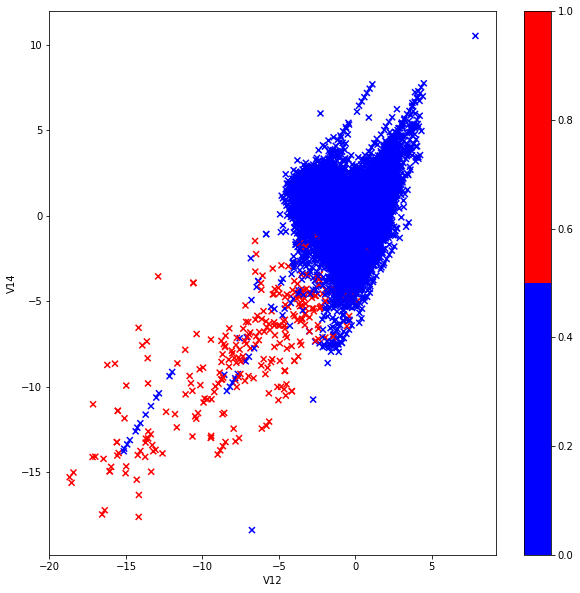

In [111]:
# Part 3a (7)
# Repeating steps 2-6 with features V12 and V14
scatter_plotter('V12', 'V14')

In [112]:
# Base on plot above , 1-component gaussian is sufficient

gaussian_fitter_auc('V12', 'V14', 1) 

For features:  V12 and V14 	  Training AUC:  0.953    	 Validation AUC:  0.970


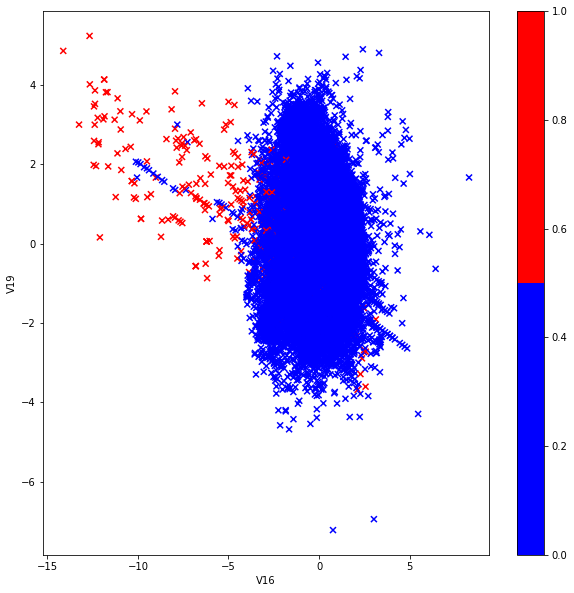

In [113]:
# Part 3a (7)
# Repeating steps 2-6 with features V16 and V19
scatter_plotter('V16', 'V19')

In [114]:
# Base on plot above , 1-component gaussian is sufficient

gaussian_fitter_auc('V16', 'V19', 1) 

For features:  V16 and V19 	  Training AUC:  0.915    	 Validation AUC:  0.937


In [115]:
# Part 3a (8-9)
# Best set with the highest Validation AUC from the test above is V12 & V14
# Tunning thresholds to find the optimum with features V12 and V14

from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(X_train[['V12', 'V14']])
p = gm.score_samples(X_valid[['V12', 'V14']])
for i in [1, 10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300]: 
    tr = sorted(p)[i] 
    f1 = f1_score(y_valid, p < tr)
    print('For i: ',i,'\t  threshold: ','%.3f'% tr ,'\t   f1 score: ', '%.3f' % f1)

For i:  1 	  threshold:  -348.119 	   f1 score:  0.021
For i:  10 	  threshold:  -155.097 	   f1 score:  0.189
For i:  20 	  threshold:  -106.460 	   f1 score:  0.310
For i:  40 	  threshold:  -65.905 	   f1 score:  0.529
For i:  60 	  threshold:  -41.456 	   f1 score:  0.692
For i:  80 	  threshold:  -30.923 	   f1 score:  0.716
For i:  100 	  threshold:  -22.004 	   f1 score:  0.694
For i:  120 	  threshold:  -20.091 	   f1 score:  0.657
For i:  150 	  threshold:  -16.951 	   f1 score:  0.610
For i:  200 	  threshold:  -13.533 	   f1 score:  0.561
For i:  250 	  threshold:  -12.016 	   f1 score:  0.480
For i:  300 	  threshold:  -11.202 	   f1 score:  0.424


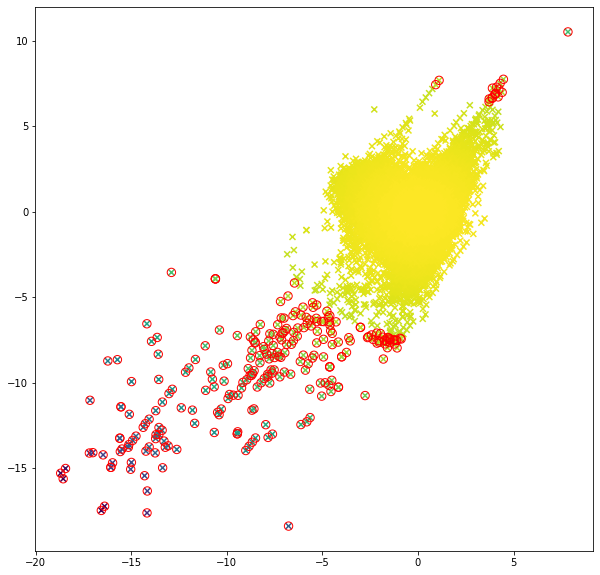

In [116]:
# Part 3a (10)
# Plot with circles on the outliers (Training dataset)

import matplotlib
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def outlier_plotter(x):
  gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  gm.fit(X_train[['V12', 'V14']])
  plt.figure(figsize=(10,10))
  p = gm.score_samples(x[['V12', 'V14']])
  plt.scatter(x['V12'], x['V14'], c=p, cmap='viridis', marker='x')  # Plots features V12 against V14

  threshold= -30.923   # Optimum threshold base on the result of the test in Part 3a above

  outliers = np.nonzero(p<threshold)[0]           # Produces a numpy array of the positions of the ouliers
  plt.scatter(x.values[outliers,12], x.values[outliers,14], marker="o",facecolor= "none",edgecolor="r",s=70) # Circles the outliers 
  plt.show()  
outlier_plotter(X_train)

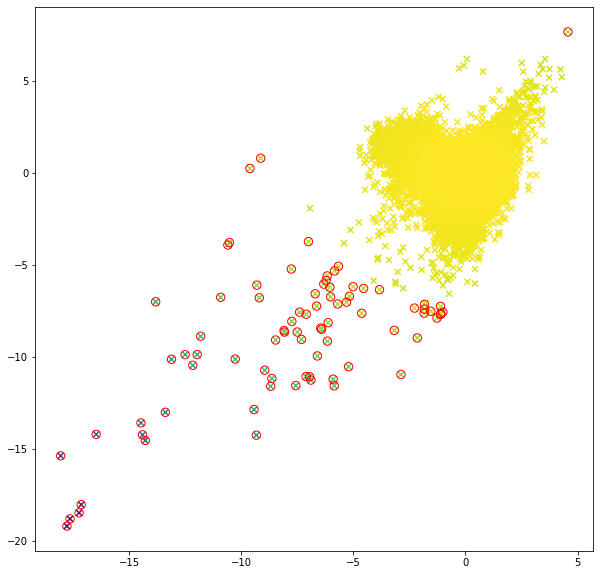

In [117]:
# Plot with circles on the outliers (Validation dataset)
outlier_plotter(X_valid)

In [118]:
# Part 3b (1)
# Selecting the 3 best features based on AUC scores in part 2
df2.sort_values(by="AUC Valid", ascending=False)

,Features,AUC Train,AUC Valid
13,V14,0.954023,0.958037
16,V17,0.927781,0.951067
9,V10,0.913807,0.945576
15,V16,0.898363,0.934111
10,V11,0.899352,0.920838
11,V12,0.908296,0.918368
3,V4,0.894652,0.916770
2,V3,0.866830,0.881650
6,V7,0.872079,0.848773
17,V18,0.799974,0.834985


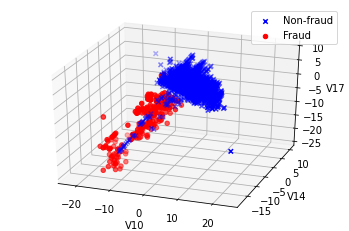

In [119]:
# Part 3b (2)
# Features selected are V14, V17 and V10
# 3D plotting of features V10, V14, V17

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1='V10', f2='V14', f3='V17', angle=290):
  X_train_3f = pd.DataFrame(data = X_train, columns=[f1, f2, f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='b', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()
plot_3d(X_train , y_train, f1='V10', f2='V14', f3='V17', angle=290)

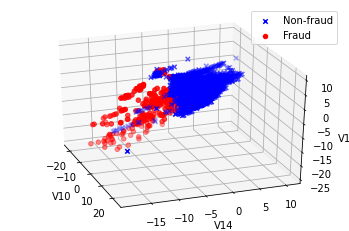

In [120]:
plot_3d(X_train , y_train, f1='V10', f2='V14', f3='V17', angle=340)

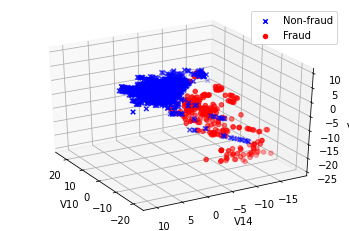

In [121]:
plot_3d(X_train , y_train, f1='V10', f2='V14', f3='V17', angle=150)

In [122]:
# # Part 3b (2)
# Base on plot above, 1-component gaussian is sufficient
# Fitting 1-component gaussian on features V10, V14 and V17

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(X_train[['V10', 'V14', 'V17']])                                    
p_train = gm.score_samples(X_train[['V10', 'V14', 'V17']])   
p_valid = gm.score_samples(X_valid[['V10', 'V14', 'V17']])    
auc_train = roc_auc_score(y_train, -1 * p_train)                       
auc_valid = roc_auc_score(y_valid, -1 * p_valid)
print('For features V10, V14 and V17: ', '\t  Training AUC: ','%.3f'% auc_train ,'  \t Validation AUC: ', '%.3f' % auc_valid)

For features V10, V14 and V17:  	  Training AUC:  0.960   	 Validation AUC:  0.981


In [123]:
# Part 3b (3)
# Tunning thresholds to find the optimum with features V10, V14 and V17

from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(X_train[['V10', 'V14', 'V17']])
p = gm.score_samples(X_valid[['V10', 'V14', 'V17']])
for i in [1, 10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300]: 
    tr = sorted(p)[i] 
    f1 = f1_score(y_valid, p < tr)
    print('For i: ',i,'\t  threshold: ','%.3f'% tr ,'\t   f1 score: ', '%.3f' % f1)

For i:  1 	  threshold:  -546.712 	   f1 score:  0.021
For i:  10 	  threshold:  -379.117 	   f1 score:  0.189
For i:  20 	  threshold:  -217.542 	   f1 score:  0.328
For i:  40 	  threshold:  -129.628 	   f1 score:  0.529
For i:  60 	  threshold:  -82.623 	   f1 score:  0.628
For i:  80 	  threshold:  -68.519 	   f1 score:  0.614
For i:  100 	  threshold:  -59.952 	   f1 score:  0.571
For i:  120 	  threshold:  -54.651 	   f1 score:  0.565
For i:  150 	  threshold:  -43.947 	   f1 score:  0.504
For i:  200 	  threshold:  -33.971 	   f1 score:  0.466
For i:  250 	  threshold:  -27.926 	   f1 score:  0.445
For i:  300 	  threshold:  -24.395 	   f1 score:  0.424


## **Part 4:  Two Gaussian model with single feature. [3 Marks]**
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.5]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). To start, consider $c$ in $[0,10]$ with steps of 0.1. You can change this window in your experiments if needed. **[0.5]**
  5. Repeat the steps above for all the features. What is the best F1 Score, Precision and Recall that you get for training and validation? Which feature and what c? Show your results in a table. **For the validation set, best F1 score, precision, recall, feature and c are 0.760736, 0.925373, 0.645833, V12 and 5.5 as shown in `df6` while for the training set, 0.655493, 0.822430, 0.544892, V12 and 5.5.**
  6. Can we report AUC for this model using the existing AUC function from sklearn? Why? **We can't report AUC for this model using the existing function in sklearn because this is a two gaussian model which returns two sets of  different log likelihoods, if we are to compute AUC using  *auc = roc_auc_score(y_valid, -1 * p)*, we may think of p to be *(S1 * S2)* which will result to a positive value. This will ultimately make the AUC very low as seen in the code cell Part 4 (6).** 

In [124]:
# Part 4 (1-4)
# Selecting optimum c for all features based on validation set F1 score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

def c_selector(x, y):
  features_iterate = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
  for i in features_iterate:
    G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
    G1.fit(X_train[i][y_train==0].values.reshape(-1,1))            #Fitting Gaussian model on non-fraudulent transactions ONLY
    S1 = G1.score_samples(x[i].values.reshape(-1,1))
    G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
    G2.fit(X_train[i][y_train==1].values.reshape(-1,1))               #Fitting Gaussian model on fraudulent transactions ONLY
    S2 = G2.score_samples(x[i].values.reshape(-1,1))
    f1_list = []
    c_iterate = np.arange(0.1, 10.1, 0.2)
    for c in c_iterate: 
      f1 = f1_score(y, S1 < c * S2)
      f1_list.append(f1)
      print('For Feature: ', i, ' c: ', '%.1f' % c,' f1 score: ', '%.3f' % f1)
    print('Maximum F1 score is: ', '%.3f' % max(f1_list))
    print('\n')
c_selector(X_valid, y_valid)


For Feature:  V1  c:  0.1  f1 score:  0.003
For Feature:  V1  c:  0.3  f1 score:  0.003
For Feature:  V1  c:  0.5  f1 score:  0.003
For Feature:  V1  c:  0.7  f1 score:  0.018
For Feature:  V1  c:  0.9  f1 score:  0.027
For Feature:  V1  c:  1.1  f1 score:  0.035
For Feature:  V1  c:  1.3  f1 score:  0.040
For Feature:  V1  c:  1.5  f1 score:  0.040
For Feature:  V1  c:  1.7  f1 score:  0.043
For Feature:  V1  c:  1.9  f1 score:  0.046
For Feature:  V1  c:  2.1  f1 score:  0.049
For Feature:  V1  c:  2.3  f1 score:  0.056
For Feature:  V1  c:  2.5  f1 score:  0.061
For Feature:  V1  c:  2.7  f1 score:  0.069
For Feature:  V1  c:  2.9  f1 score:  0.073
For Feature:  V1  c:  3.1  f1 score:  0.073
For Feature:  V1  c:  3.3  f1 score:  0.078
For Feature:  V1  c:  3.5  f1 score:  0.083
For Feature:  V1  c:  3.7  f1 score:  0.085
For Feature:  V1  c:  3.9  f1 score:  0.091
For Feature:  V1  c:  4.1  f1 score:  0.097
For Feature:  V1  c:  4.3  f1 score:  0.106
For Feature:  V1  c:  4.5  f1 sc

In [125]:
# Part 4 (5) 
# Performance of two gaussian model (Validation set)

from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

def two_gaussian_performance_metric(x, y):
  features_optimum_c = {'V1': 8.5 , 'V2': 5.7, 'V3': 9.7, 'V4': 4.9, 'V5': 8.3, 'V6': 1.9, 'V7': 8.1,     # Based on maximum F1 score as presented in the 
                       'V8': 9.1, 'V9': 3.3, 'V10': 7.5, 'V11': 3.7, 'V12': 5.5, 'V13': 1.1, 'V14': 9.5,  # results above in Part 4 (1-4)
                       'V15': 1.1, 'V16': 5.3, 'V17': 7.3, 'V18': 5.1, 'V19': 3.3, 'V20': 1.5,'V21': 1.5,
                       'V22': 2.5, 'V23': 2.3, 'V24': 0.7, 'V25': 1.7, 'V26': 0.9, 'V27': 3.1, 'V28': 2.1} 
  features = []
  optimum_c = []
  precision = []                 
  recall = []
  f1score = []
  for k, v in features_optimum_c.items():    
    G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
    G1.fit(X_train[k][y_train==0].values.reshape(-1,1))      # Fits model on non-fraudulents transactions ONLY      
    S1 = G1.score_samples(x[k].values.reshape(-1,1))
    G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
    G2.fit(X_train[k][y_train==1].values.reshape(-1,1))       # Fits model on fraudulents transactions ONLY         
    S2 = G2.score_samples(x[k].values.reshape(-1,1))
    pr = precision_score(y, S1 < v * S2)
    re = recall_score(y, S1 < v * S2)
    f1 = f1_score(y, S1 < v * S2)
    features.append(k)
    optimum_c.append(v)
    precision.append(pr)
    recall.append(re)
    f1score.append(f1)
  zipped = list(zip(features, optimum_c, f1score, precision, recall))
  df6 = pd.DataFrame(zipped, columns=['Features', 'Optimum c', 'Best F1 score', 'Precision', 'Recall'])
  return df6
two_gaussian_performance_metric(X_valid, y_valid)

,Features,Optimum c,Best F1 score,Precision,Recall
0,V1,8.5,0.173333,0.240741,0.135417
1,V2,5.7,0.232143,0.812500,0.135417
2,V3,9.7,0.312057,0.488889,0.229167
3,V4,4.9,0.397727,0.437500,0.364583
4,V5,8.3,0.210526,0.285714,0.166667
5,V6,1.9,0.106870,0.070707,0.218750
6,V7,8.1,0.255924,0.234783,0.281250
7,V8,9.1,0.121827,0.118812,0.125000
8,V9,3.3,0.476190,0.686275,0.364583
9,V10,7.5,0.503497,0.765957,0.375000


In [126]:
# Part 4 (5) 
# Performance of two Gaussian model (Training set)

two_gaussian_performance_metric(X_train, y_train)

,Features,Optimum c,Best F1 score,Precision,Recall
0,V1,8.5,0.071579,0.111842,0.052632
1,V2,5.7,0.097143,0.629630,0.052632
2,V3,9.7,0.256959,0.416667,0.185759
3,V4,4.9,0.358792,0.420833,0.312693
4,V5,8.3,0.156313,0.221591,0.120743
5,V6,1.9,0.107829,0.070805,0.226006
6,V7,8.1,0.230657,0.218232,0.244582
7,V8,9.1,0.055641,0.055556,0.055728
8,V9,3.3,0.425263,0.664474,0.312693
9,V10,7.5,0.443515,0.683871,0.328173


In [127]:
# Part 4 (6)
# Trying to report AUC for the two gaussian model

from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train['V12'][y_train==0].values.reshape(-1,1))            
S1 = G1.score_samples(X_valid['V12'].values.reshape(-1,1))
G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G2.fit(X_train['V12'][y_train==1].values.reshape(-1,1))               
S2 = G2.score_samples(X_valid['V12'].values.reshape(-1,1))
auc = roc_auc_score(y_valid, -1 * (S1 * S2))     # p is assumed to be (S1 * S2)
print('AUC: ','%.3f' % auc)


AUC:  0.086


## **Part 5: Multivariate and Mixture of Gaussians Distribution [3 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) .
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score, Precision and Recall (after tuning the threshold) for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[3]**


**HINT !**

You might want to try a two gaussian model, multiple features, single component for valid transaction and multiple components for fraudulent ones! Why does it make sense to have multiple components for the fraudulent transactions? **This makes sense because the ouliers are very far away from each other and from the mean, a multicomponent distribution will be able to fit them more effectively**

In [128]:
# Two Gaussian model, buiding a function for tunning n_components and c

from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

def two_gaussian_tunner(x):
  for i in range(1, 6):
    G1 = GaussianMixture(n_components = i, covariance_type = 'full', random_state=0)
    G1.fit(X_train[x][y_train==0])      # Fitting G1 on valid transactions
    S1 = G1.score_samples(X_valid[x])
    for n in range(1, 11):
      G2 = GaussianMixture(n_components = n, covariance_type = 'full', random_state=0)
      G2.fit(X_train[x][y_train==1])      # Fitting G2 on fraudulent transactions       
      S2 = G2.score_samples(X_valid[x])
      f1_list = []
      c_iterate = np.arange(0.1, 10.1, 0.2)
      for c in c_iterate: 
        f1 = f1_score(y_valid, S1 < c * S2)
        f1_list.append(f1)
        print('For Features: ', x, ' , G1 n_components: ', i, ' , G2 n_componets: ', n, ' and c: ', '%.1f' % c,' f1 score: ', '%.3f' % f1)
      print('Maximum F1 score is: ', '%.3f' % max(f1_list))
      print('\n')

In [129]:
# Two Gaussian model buiding function 

def two_gaussian_builder(a, b, c, d, n):
  G1 = GaussianMixture(n_components = a, covariance_type = 'full', random_state=0)
  G1.fit(X_train[b][y_train==0])        
  S1_train = G1.score_samples(X_train[b])
  S1_valid = G1.score_samples(X_valid[b])
  G2 = GaussianMixture(n_components = d, covariance_type = 'full', random_state=0)
  G2.fit(X_train[b][y_train==1])      
  S2_train = G2.score_samples(X_train[b])
  S2_valid = G2.score_samples(X_valid[b])
  pr_train = precision_score(y_train, S1_train < (c * S2_train))
  pr_valid = precision_score(y_valid, S1_valid < (c * S2_valid))
  re_train = recall_score(y_train, S1_train < (c * S2_train))
  re_valid = recall_score(y_valid, S1_valid < (c * S2_valid))
  f1_train = f1_score(y_train, S1_train < (c * S2_train))
  f1_valid = f1_score(y_valid, S1_valid < (c * S2_valid))
  print(f'Two Gaussian model {n}:')
  print('Performance on training set: ', '  Precision: ', '%.3f' % pr_train, '  Recall: ', '%.3f' % re_train, '  f1 score: ', '%.3f' % f1_train)
  print('Performance on validation set: ', 'Precision: ', '%.3f' % pr_valid, '  Recall: ', '%.3f' % re_valid, '  f1 score: ', '%.3f' % f1_valid)

In [130]:
# Model 1
# Multivariate 2 Gaussian model
# Tunning n_components and c

two_gaussian_tunner(['V10','V11','V12','V14','V16','V17']) 


For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.1  f1 score:  0.003
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.3  f1 score:  0.003
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.5  f1 score:  0.005
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.7  f1 score:  0.028
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.9  f1 score:  0.076
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.1  f1 score:  0.115
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.3  f1 score:  0.150
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , G

In [131]:
# Model 1
# From tunning above optimum parameters are
# n_components G1 = 1, G2 = 7 c = 7.9

two_gaussian_builder(a=1, b=['V10','V11','V12','V14','V16','V17'], c=7.9, d=7, n=1)

Two Gaussian model 1:
Performance on training set:    Precision:  0.858   Recall:  0.749   f1 score:  0.800
Performance on validation set:  Precision:  0.963   Recall:  0.812   f1 score:  0.881


In [132]:
# Model 2
# Multivariate 2 Gaussian model
# Tunning n_components and c

two_gaussian_tunner(['V10','V11','V12','V14','V16'])

For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.1  f1 score:  0.003
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.3  f1 score:  0.003
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.5  f1 score:  0.005
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.7  f1 score:  0.021
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.9  f1 score:  0.063
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.1  f1 score:  0.118
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.3  f1 score:  0.165
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.5  f

In [133]:
# Model 2
# From tunning above optimum parameters are
# n_components G1 = 1, G2 = 4-7 (had same F1 score, but will go for 7)  c = 4.9

two_gaussian_builder(a=1, b=['V10','V11','V12','V14','V16'], c=4.9, d=7, n=2)



Two Gaussian model 2:
Performance on training set:    Precision:  0.857   Recall:  0.762   f1 score:  0.807
Performance on validation set:  Precision:  0.952   Recall:  0.823   f1 score:  0.883


In [134]:
# Model 3
# Multivariate 2 Gaussian model
# Tunning n_components and c

two_gaussian_tunner(['V10','V12','V14','V17'])

For Features:  ['V10', 'V12', 'V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.1  f1 score:  0.003
For Features:  ['V10', 'V12', 'V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.3  f1 score:  0.003
For Features:  ['V10', 'V12', 'V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.5  f1 score:  0.012
For Features:  ['V10', 'V12', 'V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.7  f1 score:  0.038
For Features:  ['V10', 'V12', 'V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.9  f1 score:  0.078
For Features:  ['V10', 'V12', 'V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.1  f1 score:  0.112
For Features:  ['V10', 'V12', 'V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.3  f1 score:  0.146
For Features:  ['V10', 'V12', 'V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.5  f1 score:  0.178
For Features:  ['V10', 'V12', 'V14', 'V1

In [135]:
# Model 3
# From tunning above optimum parameters are
# n_components G1 = 1, G2 = 2 c = 6.5

two_gaussian_builder(a=1, b=['V10','V12','V14','V17'], c=6.5, d=2, n=3)

Two Gaussian model 3:
Performance on training set:    Precision:  0.843   Recall:  0.765   f1 score:  0.802
Performance on validation set:  Precision:  0.930   Recall:  0.833   f1 score:  0.879


In [136]:
# Model 4
# Multivariate 2 Gaussian model
# Tunning n_components and c

two_gaussian_tunner(['V14','V17','V10'])

For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.1  f1 score:  0.003
For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.3  f1 score:  0.004
For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.5  f1 score:  0.018
For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.7  f1 score:  0.049
For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.9  f1 score:  0.081
For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.1  f1 score:  0.107
For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.3  f1 score:  0.141
For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.5  f1 score:  0.173
For Features:  ['V14', 'V17', 'V10']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.7  

In [137]:
# Model 4
# From tunning above optimum parameters are
# n_components G1 = 3, G2 = 9 c = 3.5

two_gaussian_builder(a=3, b=['V14','V17','V10'], c=3.5, d=9, n=4)

Two Gaussian model 4:
Performance on training set:    Precision:  0.863   Recall:  0.740   f1 score:  0.797
Performance on validation set:  Precision:  0.940   Recall:  0.812   f1 score:  0.872


In [138]:
# Model 5
# Multivariate 2 Gaussian model
# Tunning n_components and c

two_gaussian_tunner(['V14','V17'])

For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.1  f1 score:  0.003
For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.3  f1 score:  0.007
For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.5  f1 score:  0.026
For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.7  f1 score:  0.060
For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  0.9  f1 score:  0.092
For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.1  f1 score:  0.119
For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.3  f1 score:  0.156
For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.5  f1 score:  0.188
For Features:  ['V14', 'V17']  , G1 n_components:  1  , G2 n_componets:  1  and c:  1.7  f1 score:  0.215
For Features:  ['V14', 'V17']  , G1 n_componen

In [139]:
# Model 5
# From tunning above optimum parameters are
# n_components G1 = 3, G2 = 9 c = 2.9

two_gaussian_builder(a=3, b=['V14','V17'], c=2.9, d=9, n=5)

Two Gaussian model 5:
Performance on training set:    Precision:  0.806   Recall:  0.718   f1 score:  0.759
Performance on validation set:  Precision:  0.892   Recall:  0.771   f1 score:  0.827


In [140]:
# One Gaussian model, buiding a function for tunning n_components and threshold

from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

def one_gaussian_tunner(x):
  for n in range(1, 11):
    gm = GaussianMixture(n_components = n, covariance_type = 'full', random_state=0)
    gm.fit(X_train[x])          # Fitting on both classes
    p = gm.score_samples(X_valid[x])
    f1_list = []
    for i in [1, 10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300]: 
      tr = sorted(p)[i] 
      f1 = f1_score(y_valid, p < tr)
      f1_list.append(f1)
      print('For Features: ', x, ' , n_components: ', n, ' and i: ',i,'\t threshold: ','%.3f'% tr ,'\t f1 score: ', '%.3f' % f1)
    print('Maximum F1 score is: ', '%.3f' % max(f1_list))
    print('\n')

In [141]:
# One Gaussian model buiding function 

def one_gaussian_builder(a, b, tr, n):
   gm = GaussianMixture(n_components = a, covariance_type = 'full', random_state=0)
   gm.fit(X_train[b])               
   p_train = gm.score_samples(X_train[b])
   p_valid = gm.score_samples(X_valid[b])
   auc_train = roc_auc_score(y_train, -1 * p_train)
   auc_valid = roc_auc_score(y_valid, -1 * p_valid)
   treshold = tr
   pr_train = precision_score(y_train, p_train < tr)
   pr_valid = precision_score(y_valid, p_valid < tr)  
   re_train = recall_score(y_train, p_train < tr)
   re_valid = recall_score(y_valid, p_valid < tr)
   f1_train = f1_score(y_train, p_train < tr)
   f1_valid = f1_score(y_valid, p_valid < tr)
   print(f'One Gaussian model {n}:') 
   print('Performance on Training set: ','   AUC: ', '%.3f' % auc_train, '\t Precision: ', '%.3f' % pr_train, '\t Recall: ', '%.3f' % re_train, '\t f1 score: ', '%.3f' % f1_train)
   print('Performance on  Validation set: ','AUC: ', '%.3f' % auc_valid, '\t Precision: ', '%.3f' % pr_valid, '\t Recall: ', '%.3f' % re_valid, '\t f1 score: ', '%.3f' % f1_valid)

In [142]:
# Model 6
# Multivariate One Gaussian model
# Tunning n_components and threshold

one_gaussian_tunner(['V10','V11','V12','V14','V16','V17'])


For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , n_components:  1  and i:  1 	 threshold:  -828.827 	 f1 score:  0.021
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , n_components:  1  and i:  10 	 threshold:  -618.419 	 f1 score:  0.189
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , n_components:  1  and i:  20 	 threshold:  -354.476 	 f1 score:  0.310
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , n_components:  1  and i:  40 	 threshold:  -177.080 	 f1 score:  0.529
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , n_components:  1  and i:  60 	 threshold:  -103.596 	 f1 score:  0.692
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , n_components:  1  and i:  80 	 threshold:  -88.348 	 f1 score:  0.682
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , n_components:  1  and i:  100 	 threshold:  -71.481 	 f1 score:  0.643
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16', 'V17']  , n_components:  1 

In [143]:
# Model 6
# From tunning above, optimum parameters are
# n_components = 1, threshold = -103.596

one_gaussian_builder(1, ['V10','V11','V12','V14','V16','V17'] , -103.596, 1)

One Gaussian model 1:
Performance on Training set:     AUC:  0.961 	 Precision:  0.805 	 Recall:  0.474 	 f1 score:  0.596
Performance on  Validation set:  AUC:  0.973 	 Precision:  0.902 	 Recall:  0.573 	 f1 score:  0.701


In [144]:
# Model 7
# Multivariate One Gaussian model
# Tunning n_components and threshold

one_gaussian_tunner(['V10','V11','V12','V14','V16'])


For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , n_components:  1  and i:  1 	 threshold:  -552.197 	 f1 score:  0.021
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , n_components:  1  and i:  10 	 threshold:  -350.583 	 f1 score:  0.189
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , n_components:  1  and i:  20 	 threshold:  -222.692 	 f1 score:  0.310
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , n_components:  1  and i:  40 	 threshold:  -117.559 	 f1 score:  0.515
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , n_components:  1  and i:  60 	 threshold:  -87.136 	 f1 score:  0.628
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , n_components:  1  and i:  80 	 threshold:  -75.521 	 f1 score:  0.636
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , n_components:  1  and i:  100 	 threshold:  -65.508 	 f1 score:  0.612
For Features:  ['V10', 'V11', 'V12', 'V14', 'V16']  , n_components:  1  and i:  120 	 threshold:  -55.639 	 f1 score:  0.583
For

In [145]:
# Model 7
# From tunning above, optimum parameters are
# n_components = 5, threshold = -22.995 

one_gaussian_builder(5, ['V10','V11','V12','V14','V16'] , -22.995 , 2)


One Gaussian model 2:
Performance on Training set:     AUC:  0.961 	 Precision:  0.726 	 Recall:  0.567 	 f1 score:  0.637
Performance on  Validation set:  AUC:  0.977 	 Precision:  0.753 	 Recall:  0.635 	 f1 score:  0.689


In [146]:
# Model 8
# Multivariate One Gaussian model
# Tunning n_components and threshold

one_gaussian_tunner(['V10','V12','V14','V17'])

For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components:  1  and i:  1 	 threshold:  -682.918 	 f1 score:  0.021
For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components:  1  and i:  10 	 threshold:  -514.113 	 f1 score:  0.189
For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components:  1  and i:  20 	 threshold:  -277.661 	 f1 score:  0.310
For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components:  1  and i:  40 	 threshold:  -147.248 	 f1 score:  0.529
For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components:  1  and i:  60 	 threshold:  -90.816 	 f1 score:  0.667
For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components:  1  and i:  80 	 threshold:  -74.984 	 f1 score:  0.670
For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components:  1  and i:  100 	 threshold:  -62.863 	 f1 score:  0.622
For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components:  1  and i:  120 	 threshold:  -57.299 	 f1 score:  0.583
For Features:  ['V10', 'V12', 'V14', 'V17']  , n_components

In [147]:
# Model 8
# From tunning above, optimum parameters are
# n_components = 1, threshold = -74.984 

one_gaussian_builder(1, ['V10','V12','V14','V17'] , -74.984 , 3)

One Gaussian model 3:
Performance on Training set:     AUC:  0.959 	 Precision:  0.700 	 Recall:  0.536 	 f1 score:  0.607
Performance on  Validation set:  AUC:  0.978 	 Precision:  0.728 	 Recall:  0.615 	 f1 score:  0.667


In [148]:
# Model 9
# Multivariate One Gaussian model
# Tunning n_components and threshold

one_gaussian_tunner(['V14','V17','V10'])

For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  1 	 threshold:  -546.712 	 f1 score:  0.021
For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  10 	 threshold:  -379.117 	 f1 score:  0.189
For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  20 	 threshold:  -217.542 	 f1 score:  0.328
For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  40 	 threshold:  -129.628 	 f1 score:  0.529
For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  60 	 threshold:  -82.623 	 f1 score:  0.628
For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  80 	 threshold:  -68.519 	 f1 score:  0.614
For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  100 	 threshold:  -59.952 	 f1 score:  0.571
For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  120 	 threshold:  -54.651 	 f1 score:  0.565
For Features:  ['V14', 'V17', 'V10']  , n_components:  1  and i:  150 	 threshold:  -43.947 	 f1 score:  0.504
For 

In [149]:
# Model 9
# From tunning above, optimum parameters are
# n_components = 1, threshold = -82.623

one_gaussian_builder(1, ['V14','V17','V10'] , -82.623 , 4)

One Gaussian model 4:
Performance on Training set:     AUC:  0.960 	 Precision:  0.733 	 Recall:  0.409 	 f1 score:  0.525
Performance on  Validation set:  AUC:  0.981 	 Precision:  0.817 	 Recall:  0.510 	 f1 score:  0.628


In [150]:
# Model 10
# Multivariate One Gaussian model
# Tunning n_components and threshold

one_gaussian_tunner(['V14','V17'])

For Features:  ['V14', 'V17']  , n_components:  1  and i:  1 	 threshold:  -493.451 	 f1 score:  0.021
For Features:  ['V14', 'V17']  , n_components:  1  and i:  10 	 threshold:  -284.351 	 f1 score:  0.189
For Features:  ['V14', 'V17']  , n_components:  1  and i:  20 	 threshold:  -166.797 	 f1 score:  0.310
For Features:  ['V14', 'V17']  , n_components:  1  and i:  40 	 threshold:  -103.413 	 f1 score:  0.544
For Features:  ['V14', 'V17']  , n_components:  1  and i:  60 	 threshold:  -58.163 	 f1 score:  0.679
For Features:  ['V14', 'V17']  , n_components:  1  and i:  80 	 threshold:  -38.846 	 f1 score:  0.705
For Features:  ['V14', 'V17']  , n_components:  1  and i:  100 	 threshold:  -27.742 	 f1 score:  0.714
For Features:  ['V14', 'V17']  , n_components:  1  and i:  120 	 threshold:  -23.915 	 f1 score:  0.722
For Features:  ['V14', 'V17']  , n_components:  1  and i:  150 	 threshold:  -21.753 	 f1 score:  0.650
For Features:  ['V14', 'V17']  , n_components:  1  and i:  200 	 th

In [151]:
# Model 10
# From tunning above, optimum parameters are
# n_components = 2, threshold = -9.464 

one_gaussian_builder(2, ['V14','V17'] , -9.464  , 5)

One Gaussian model 5:
Performance on Training set:     AUC:  0.960 	 Precision:  0.599 	 Recall:  0.749 	 f1 score:  0.666
Performance on  Validation set:  AUC:  0.976 	 Precision:  0.658 	 Recall:  0.823 	 f1 score:  0.731


In [152]:
# Result of experiment
import pandas as pd

model = ['Two Gaussian', 'Two Gaussian', 'Two Gaussian', 'Two Gaussian', 'Two Gaussian', 
         'One Gaussian', 'One Gaussian', 'One Gaussian', 'One Gaussian', 'One Gaussian']
n_features = [6, 5, 4, 3, 2, 6, 5, 4, 3, 2]
features = ['V10,V11,V12,V14,V16,V17', 'V10,V11,V12,V14,V16', 'V10,V12,V14,V17', 'V10,V14,V17', 'V14,V17', 
            'V10,V11,V12,V14,V16,V17', 'V10,V11,V12,V14,V16', 'V10,V12,V14,V17', 'V10,V14,V17', 'V14,V17']
n_gaussian = [2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
n_components = ['G1=1, G2=7', 'G1=1, G2=7', 'G1=1, G2=2', 'G1=3, G2=9', 'G1=3, G2=9', 
                1, 5, 1, 1, 2]
f1_score_valid = [0.881, 0.883, 0.879, 0.872, 0.827, 0.701, 0.689, 0.667, 0.628, 0.731]
zipped = list(zip(model, n_features, features, n_gaussian, n_components, f1_score_valid))
df7 = pd.DataFrame(zipped, columns=['Model Type', 'Optimum no of Features', 'Features Used', 
                                    'No of Gaussian', 'No of Components', 'Validation F1 Score'])
df7

,Model Type,Optimum no of Features,Features Used,No of Gaussian,No of Components,Validation F1 Score
0,Two Gaussian,6,"V10,V11,V12,V14,V16,V17",2,"G1=1, G2=7",0.881
1,Two Gaussian,5,"V10,V11,V12,V14,V16",2,"G1=1, G2=7",0.883
2,Two Gaussian,4,"V10,V12,V14,V17",2,"G1=1, G2=2",0.879
3,Two Gaussian,3,"V10,V14,V17",2,"G1=3, G2=9",0.872
4,Two Gaussian,2,"V14,V17",2,"G1=3, G2=9",0.827
5,One Gaussian,6,"V10,V11,V12,V14,V16,V17",1,1,0.701
6,One Gaussian,5,"V10,V11,V12,V14,V16",1,5,0.689
7,One Gaussian,4,"V10,V12,V14,V17",1,1,0.667
8,One Gaussian,3,"V10,V14,V17",1,1,0.628
9,One Gaussian,2,"V14,V17",1,2,0.731


In [153]:
df7.sort_values(by="Validation F1 Score", ascending=False)

,Model Type,Optimum no of Features,Features Used,No of Gaussian,No of Components,Validation F1 Score
1,Two Gaussian,5,"V10,V11,V12,V14,V16",2,"G1=1, G2=7",0.883
0,Two Gaussian,6,"V10,V11,V12,V14,V16,V17",2,"G1=1, G2=7",0.881
2,Two Gaussian,4,"V10,V12,V14,V17",2,"G1=1, G2=2",0.879
3,Two Gaussian,3,"V10,V14,V17",2,"G1=3, G2=9",0.872
4,Two Gaussian,2,"V14,V17",2,"G1=3, G2=9",0.827
9,One Gaussian,2,"V14,V17",1,2,0.731
5,One Gaussian,6,"V10,V11,V12,V14,V16,V17",1,1,0.701
6,One Gaussian,5,"V10,V11,V12,V14,V16",1,5,0.689
7,One Gaussian,4,"V10,V12,V14,V17",1,1,0.667
8,One Gaussian,3,"V10,V14,V17",1,1,0.628


## **Part 6: Evaluating performance on test set: [2 Marks]**
**Which model worked best?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[2]**


In [154]:
# Concatenating the training and validation set for the final training of the best model

df8 = X_train[['V10','V11','V12','V14','V16']]
df9 = X_valid [['V10','V11','V12','V14','V16']]
frames = [df8, df9]
X_train_valid= pd.concat(frames)

df10 = y_train
df11 = y_valid
frames2 = [df10, df11]
y_train_valid = pd.concat(frames2)

In [155]:
# Performance of best model on test set using training/validation set
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score

G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train_valid[y_train_valid==0])        
S1 = G1.score_samples(X_test[['V10','V11','V12','V14','V16']])
G2 = GaussianMixture(n_components = 7, covariance_type = 'full', random_state=0)
G2.fit(X_train_valid[y_train_valid==1])      
S2 = G2.score_samples(X_test[['V10','V11','V12','V14','V16']])
pr = precision_score(y_test, S1 < (4.9 * S2))
re = recall_score(y_test, S1 < (4.9 * S2))
f1 = f1_score(y_test, S1 < (4.9 * S2))
print('Precision: ', '%.3f' % pr, '  Recall: ', '%.3f' % re, '  F1 Score: ', '%.3f' % f1)
  

Precision:  0.815   Recall:  0.726   F1 Score:  0.768


In [156]:
# Performance of best model on test set using ONLY training set
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score

G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(X_train[['V10','V11','V12','V14','V16']][y_train==0])        
S1 = G1.score_samples(X_test[['V10','V11','V12','V14','V16']])
G2 = GaussianMixture(n_components = 7, covariance_type = 'full', random_state=0)
G2.fit(X_train[['V10','V11','V12','V14','V16']][y_train==1])      
S2 = G2.score_samples(X_test[['V10','V11','V12','V14','V16']])
pr = precision_score(y_test, S1 < (4.9 * S2))
re = recall_score(y_test, S1 < (4.9 * S2))
f1 = f1_score(y_test, S1 < (4.9 * S2))
print('Precision: ', '%.3f' % pr, '  Recall: ', '%.3f' % re, '  F1 Score: ', '%.3f' % f1)
  

Precision:  0.828   Recall:  0.726   F1 Score:  0.774
